# Packages

In [ ]:
# Install Packages
%pip install numpy scikit-learn matplotlib datetime

In [3]:
# Import Packages
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    ConfusionMatrixDisplay
)
# from google.colab import drive
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import os

# Mount Drive

In [ ]:
## Store the images directly in drive
## Alternativly comment out these line and store them locally

## Comment this out if not required
# drive.mount('/content/drive')

## Comment out one of the below two lines
#folder_path = '/content/drive/My Drive/ML Lab/Ass 1/assets'
folder_path = 'assets'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Evaluate Model

In [13]:
def evaluate_model(model, X_test, y_test, class_names=None, folder=None):
  if class_names is None:
      class_names = np.unique(y_test)

  # Predictions
  y_pred = model.predict(X_test)

  # Metrics
  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
  rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
  f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

  # Print scores
  print(f"Accuracy:  {acc:.4f}")
  print(f"Precision: {prec:.4f}")
  print(f"Recall:    {rec:.4f}")
  print(f"F1-score:  {f1:.4f}")
  print("\nClassification Report:")
  print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))

  # Confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
  disp.plot(cmap=plt.cm.Blues)
  plt.title('Confusion Matrix')
  plt.xlabel("Predicted")
  plt.ylabel("True")

  # Save Fig
  timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
  if folder is None:
    folder = f"plot_{timestamp}.png"
  save_path = os.path.join(folder_path, folder)
  plt.savefig(save_path)
  print(f"Plot saved to {save_path}")

  plt.show()

In [14]:
def plot_decision_tree(model, X_test, y_test, criterion='gini', feature_names=None, class_names=None, folder=None):
  # Plot decision tree
  plt.figure(figsize=(30, 30))
  plot_tree(
      dt,
      filled=True,
      feature_names=feature_names,
      class_names=class_names,
      rounded=True
  )
  plt.title(f"Decision Tree ({criterion})")

  # Save Fig
  timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
  if folder is None:
    folder = f"decisiontree_{criterion}_{timestamp}.png"
  save_path = os.path.join(folder_path, folder)
  plt.savefig(save_path)
  print(f"Plot saved to {save_path}")

  plt.show()

# Iris Dataset

In [7]:
iris = load_iris()

X = iris.data
y = iris.target

print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)
print("Description:\n", iris.DESCR[:250], "...")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.40, random_state=42
)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Description:
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - se ...


## Iris: GaussianNB

--- Naive Bayes: Gaussian ---
Accuracy:  0.9667
Precision: 0.9639
Recall:    0.9639
F1-score:  0.9639

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        23
  versicolor       0.95      0.95      0.95        19
   virginica       0.94      0.94      0.94        18

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60

Plot saved to assets/iris_confusion_matrix_gaussian.png


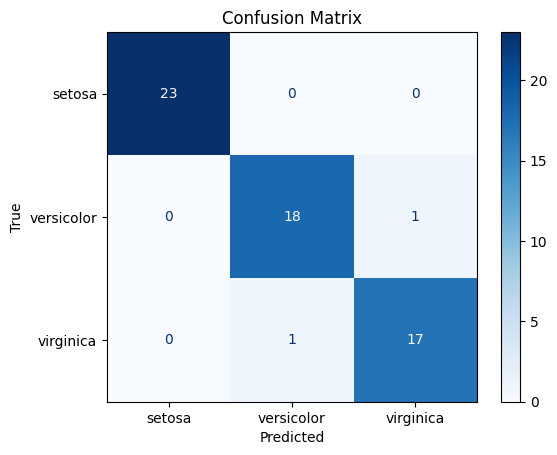

In [8]:
gnb = GaussianNB(var_smoothing=1e-05)
gnb.fit(X_train, y_train)

print("--- Naive Bayes: Gaussian ---")
evaluate_model(gnb, X_test, y_test, class_names=iris.target_names, folder="iris_confusion_matrix_gaussian.png")

## Iris: MultinomialNB

--- Naive Bayes: Multinomial ---
Accuracy:  0.9667
Precision: 0.9667
Recall:    0.9649
F1-score:  0.9639

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        23
  versicolor       1.00      0.89      0.94        19
   virginica       0.90      1.00      0.95        18

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60

Plot saved to assets/iris_confusion_matrix_multinomial.png


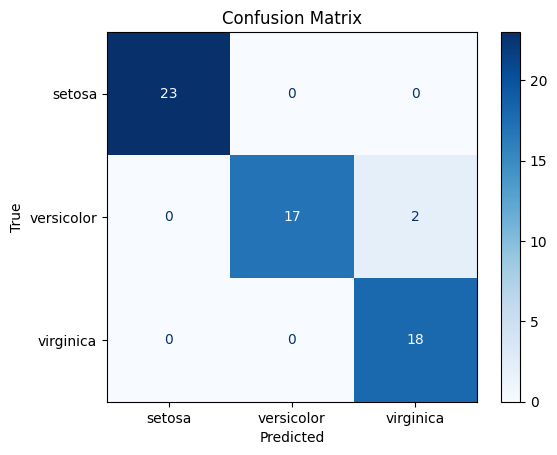

In [9]:
mnb = MultinomialNB(alpha=1.0)
mnb.fit(X_train, y_train)

print("--- Naive Bayes: Multinomial ---")
evaluate_model(mnb, X_test, y_test, class_names=iris.target_names, folder="iris_confusion_matrix_multinomial.png")

## Iris: BernoulliNB

--- Naive Bayes: Bernoulli ---
Accuracy:  0.9667
Precision: 0.9683
Recall:    0.9670
F1-score:  0.9664

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      0.96      0.98        23
  versicolor       0.90      1.00      0.95        19
   virginica       1.00      0.94      0.97        18

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

Plot saved to assets/iris_confusion_matrix_bernoulli.png


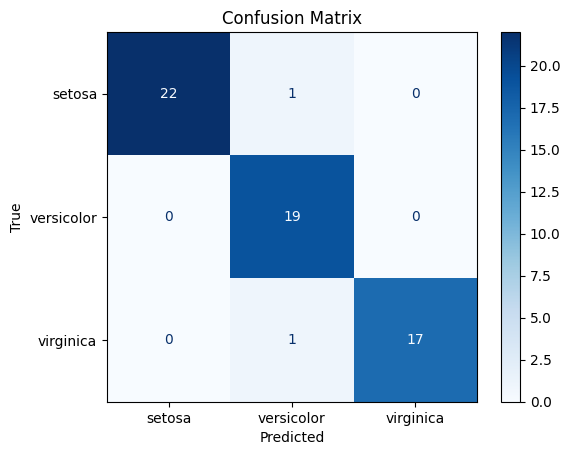

In [10]:
bnb = BernoulliNB(alpha=1.0, binarize=1.7)
bnb.fit(X_train, y_train)

print("--- Naive Bayes: Bernoulli ---")
evaluate_model(bnb, X_test, y_test, class_names=iris.target_names, folder="iris_confusion_matrix_bernoulli.png")

## Iris: Decision Tree

### Gini


--- Decision Tree (gini) ---
Accuracy:  0.9667
Precision: 0.9639
Recall:    0.9639
F1-score:  0.9639

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        23
  versicolor       0.95      0.95      0.95        19
   virginica       0.94      0.94      0.94        18

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60

Plot saved to assets/iris_confusion_matrix_gini.png


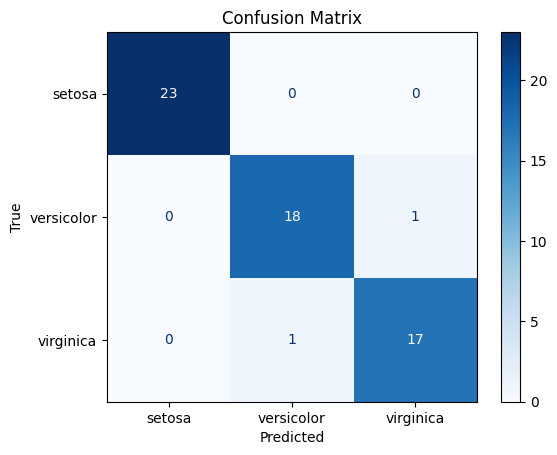

Plot saved to assets/iris_decision_tree_gini.png


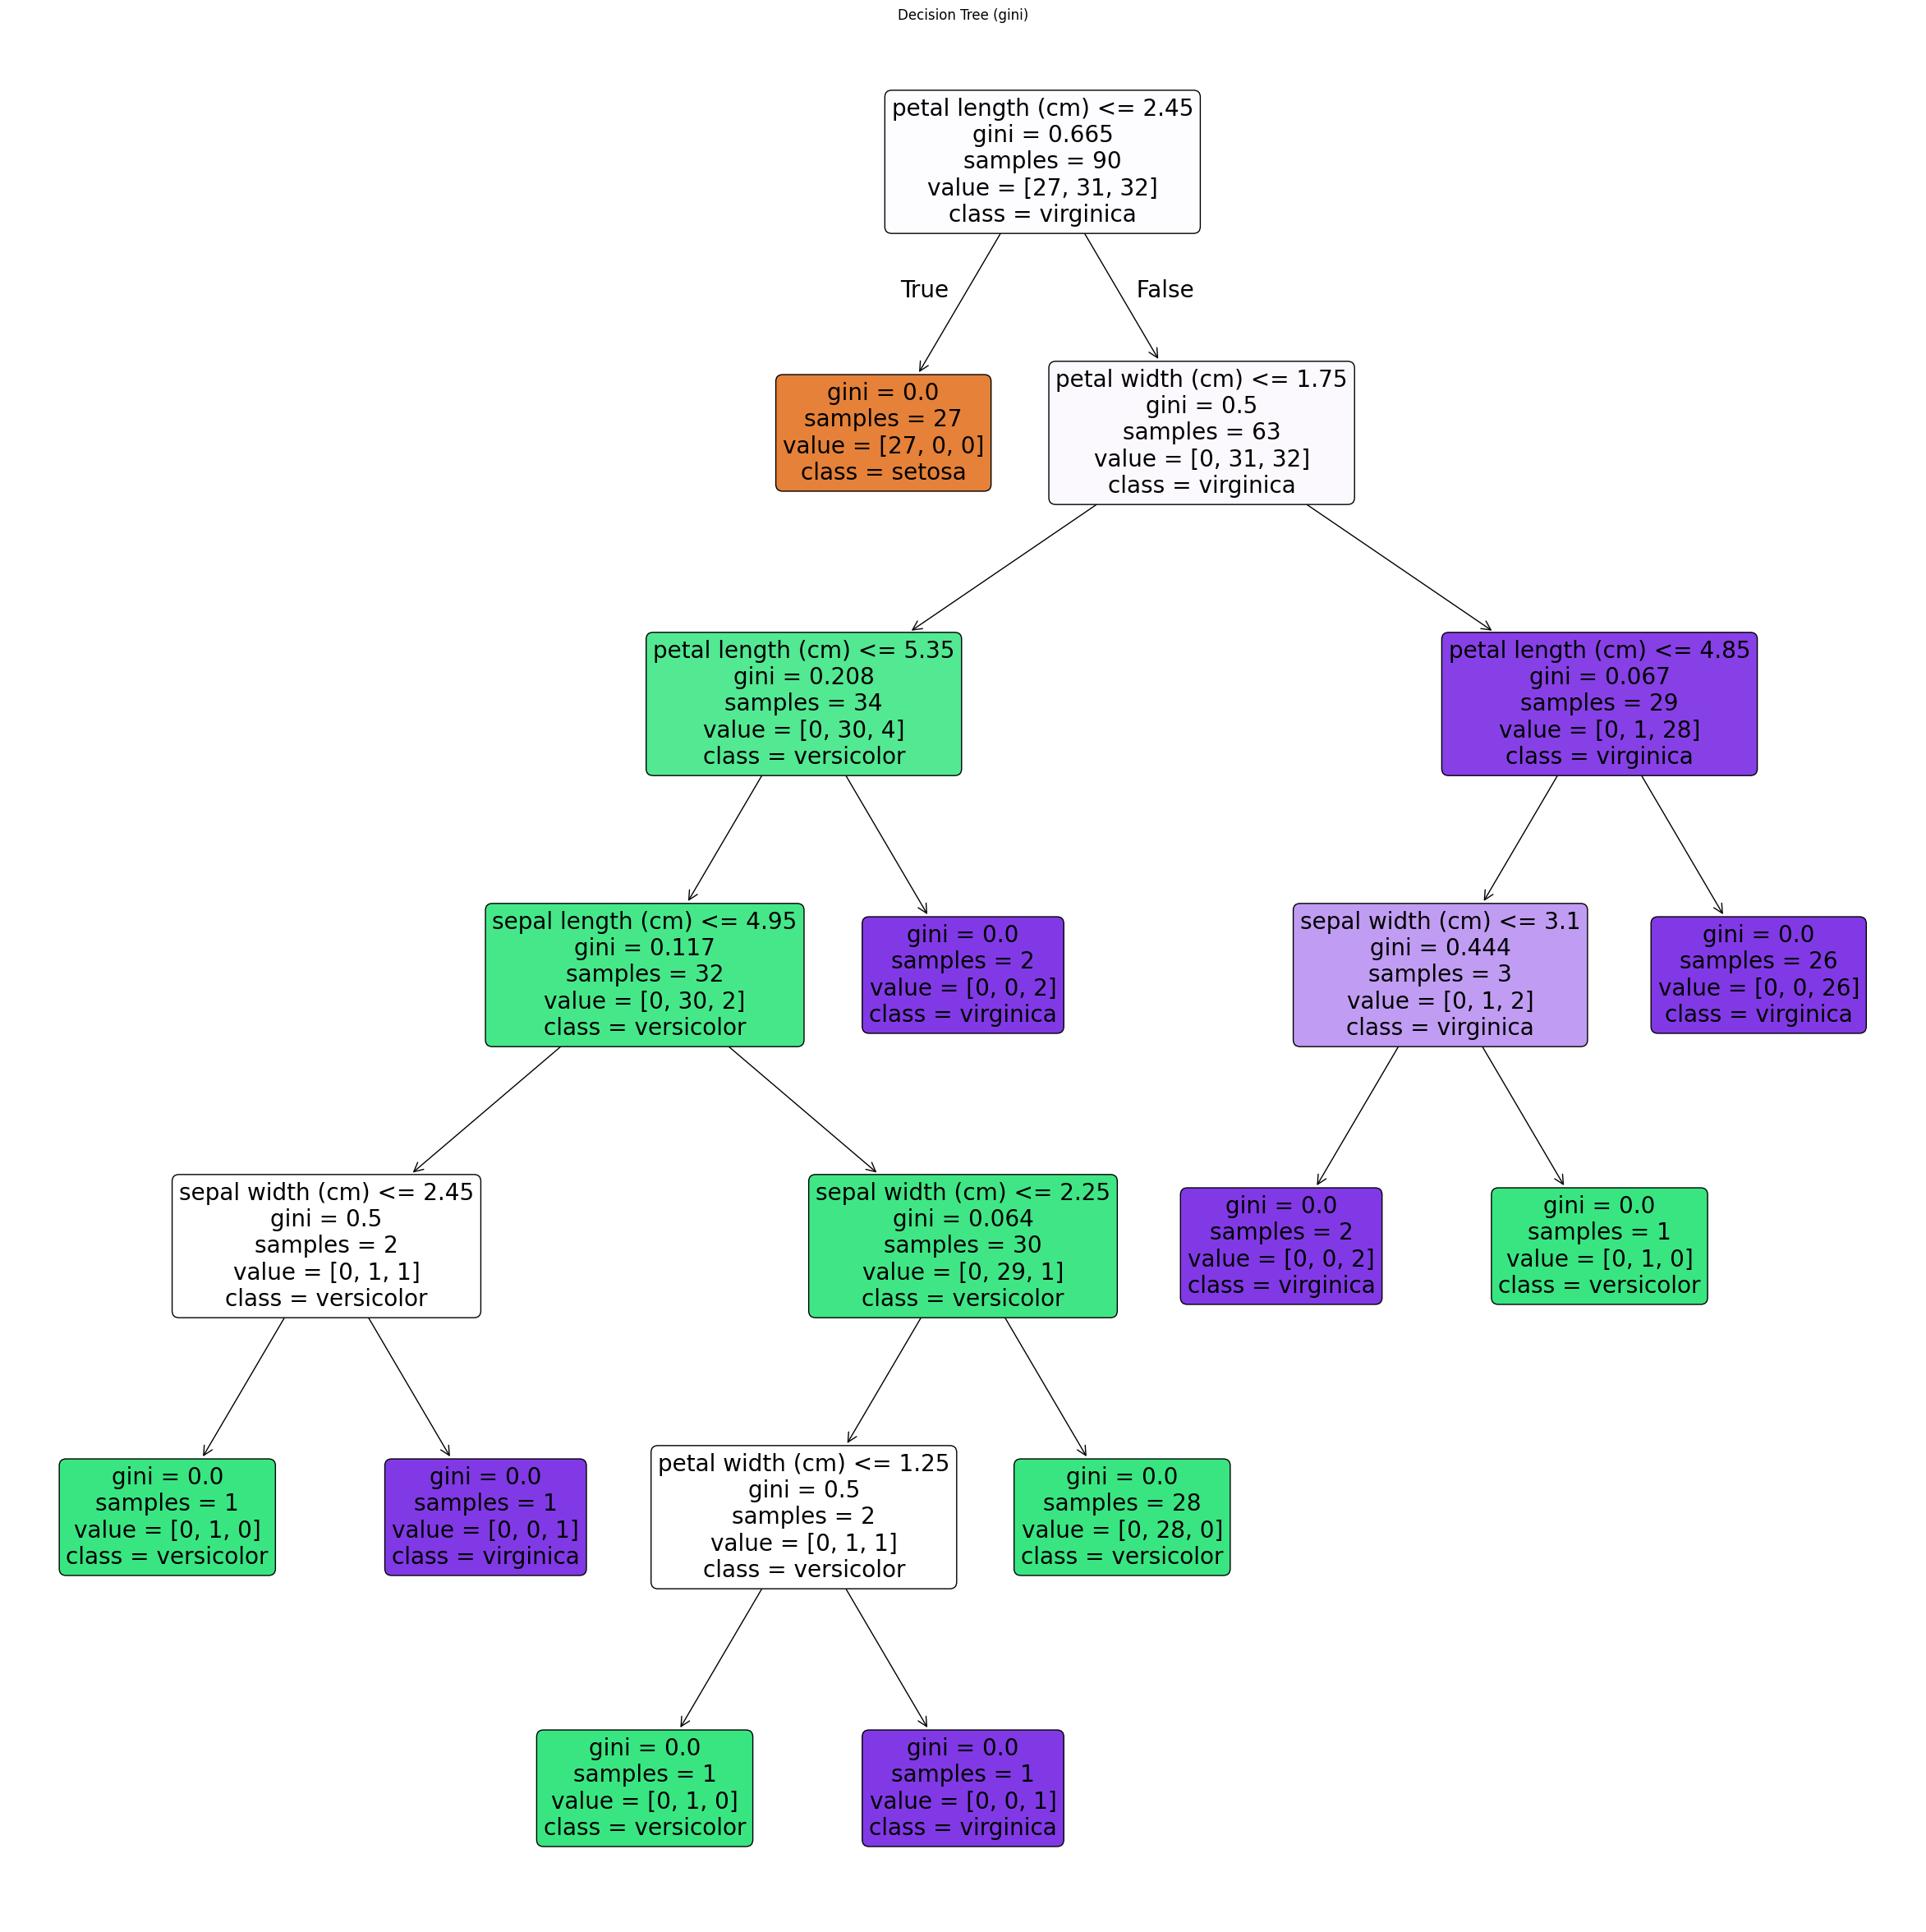

In [11]:
print(f"\n--- Decision Tree (gini) ---")

dt = DecisionTreeClassifier(
    criterion="gini",
    max_depth=None,
    random_state=42
)
dt.fit(X_train, y_train)
evaluate_model(dt, X_test, y_test, class_names=iris.target_names, folder="iris_confusion_matrix_gini.png")

plot_decision_tree(dt, X_test, y_test, criterion="gini", feature_names=iris.feature_names, class_names=iris.target_names, folder="iris_decision_tree_gini.png")

### Entropy


--- Decision Tree (entropy) ---
Accuracy:  0.9833
Precision: 0.9833
Recall:    0.9815
F1-score:  0.9819

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        23
  versicolor       0.95      1.00      0.97        19
   virginica       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Plot saved to assets/iris_confusion_matrix_entropy.png


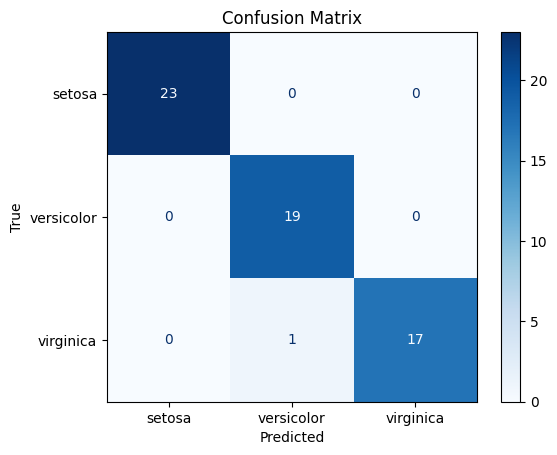

Plot saved to assets/iris_decision_tree_entropy.png


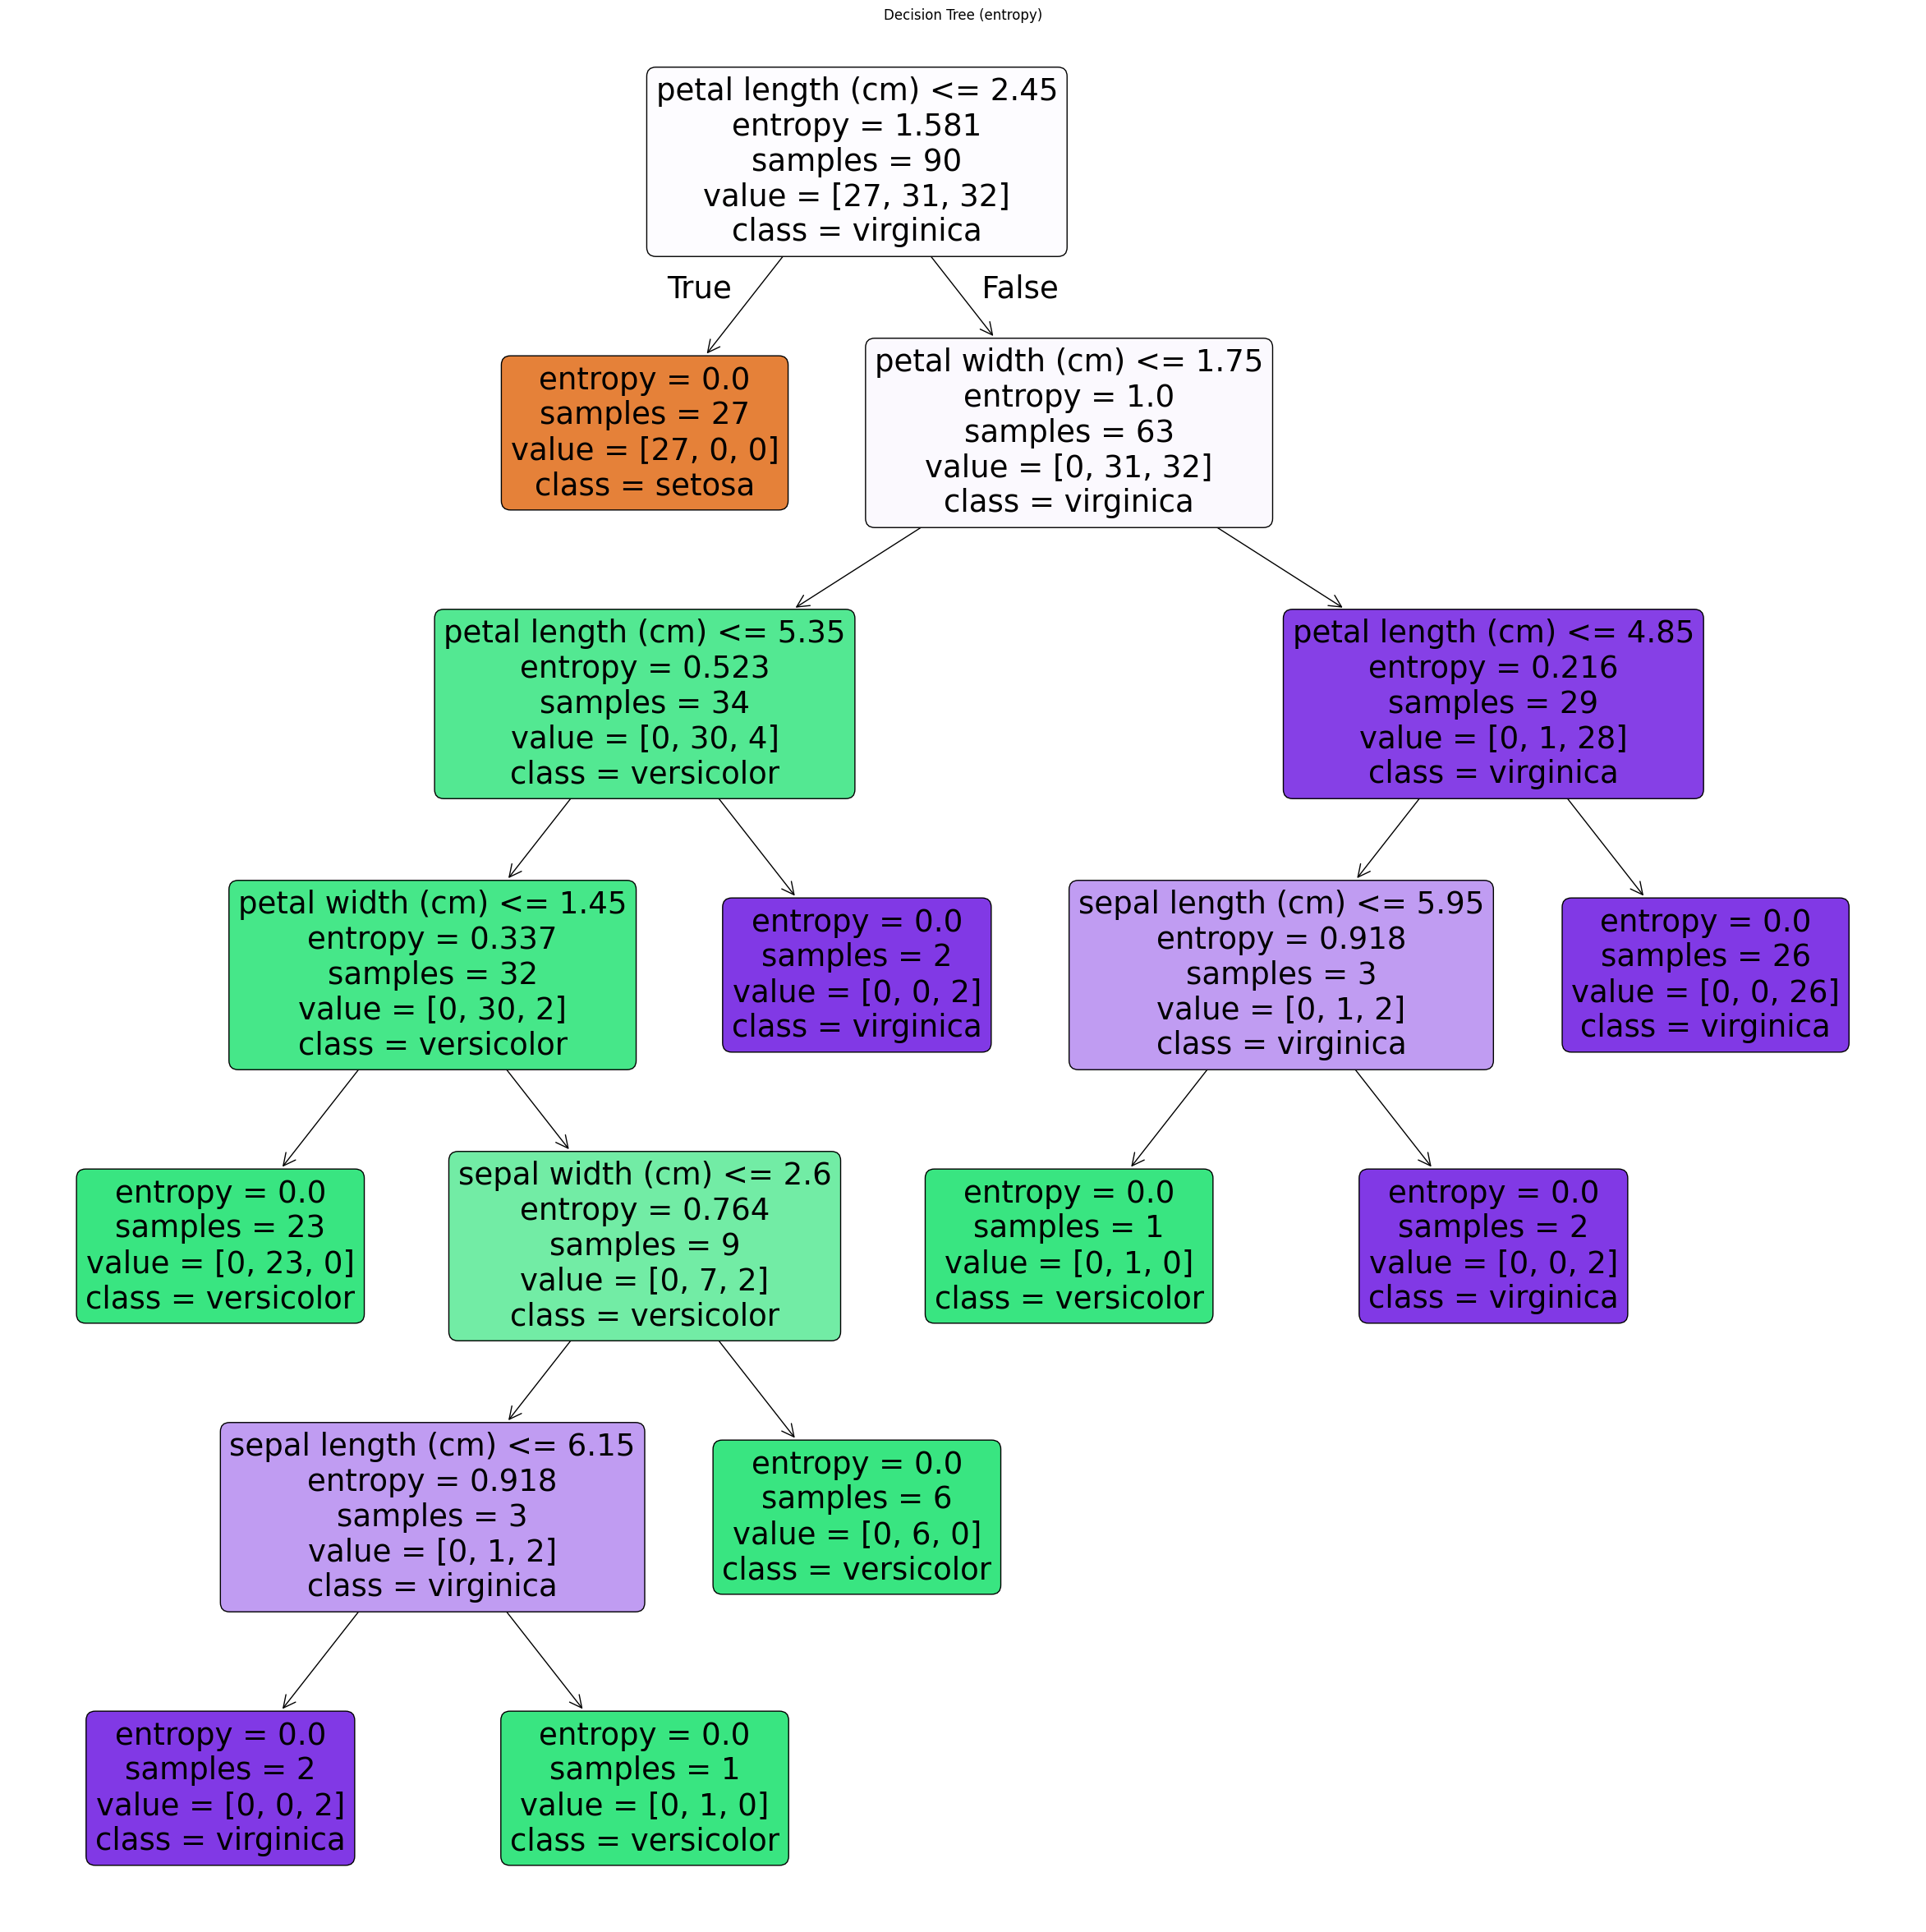

In [12]:
print(f"\n--- Decision Tree (entropy) ---")

dt = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=None,
    random_state=42
)
dt.fit(X_train, y_train)
evaluate_model(dt, X_test, y_test, class_names=iris.target_names, folder="iris_confusion_matrix_entropy.png")

plot_decision_tree(dt, X_test, y_test, criterion="entropy", feature_names=iris.feature_names, class_names=iris.target_names, folder="iris_decision_tree_entropy.png")

# Breast Cancer Dataset

In [15]:
bc = load_breast_cancer()

X = bc.data
y = bc.target

print("Feature names:", bc.feature_names)
print("Target names:", bc.target_names)
print("Description:\n", bc.DESCR[:300], "...")

# print(X[:1])
# print(y[:1])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.40, random_state=42
)

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']
Description:
 .. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of dista ...


## Breast Cancer: GaussianNB

--- Naive Bayes: Gaussian ---
Accuracy:  0.9561
Precision: 0.9642
Recall:    0.9404
F1-score:  0.9507

Classification Report:
              precision    recall  f1-score   support

   malignant       0.99      0.89      0.93        80
      benign       0.94      0.99      0.97       148

    accuracy                           0.96       228
   macro avg       0.96      0.94      0.95       228
weighted avg       0.96      0.96      0.96       228

Plot saved to assets/breast_cancer_confusion_matrix_gaussian.png


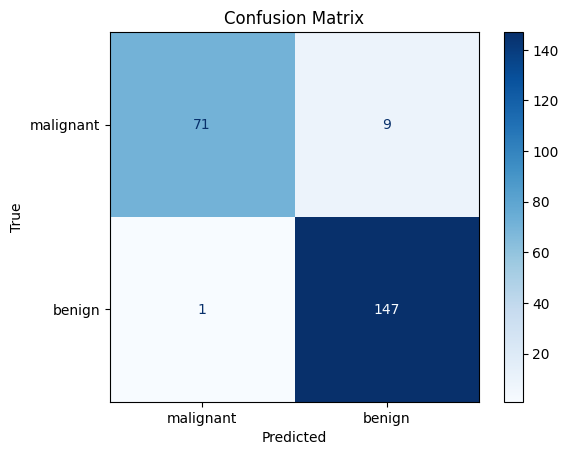

In [16]:
gnb = GaussianNB(var_smoothing=1e-05)
gnb.fit(X_train, y_train)

print("--- Naive Bayes: Gaussian ---")
evaluate_model(gnb, X_test, y_test, class_names=bc.target_names, folder="breast_cancer_confusion_matrix_gaussian.png")

## Breast Cancer: MultinomialNB

--- Naive Bayes: Multinomial ---
Accuracy:  0.9298
Precision: 0.9415
Recall:    0.9057
F1-score:  0.9200

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.82      0.89        80
      benign       0.91      0.99      0.95       148

    accuracy                           0.93       228
   macro avg       0.94      0.91      0.92       228
weighted avg       0.93      0.93      0.93       228

Plot saved to assets/breast_cancer_confusion_matrix_multinomial.png


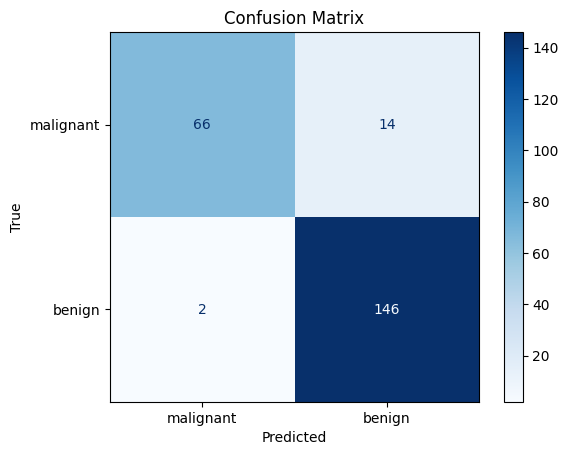

In [17]:
mnb = MultinomialNB(alpha=1)
mnb.fit(X_train, y_train)

print("--- Naive Bayes: Multinomial ---")
evaluate_model(mnb, X_test, y_test, class_names=bc.target_names, folder="breast_cancer_confusion_matrix_multinomial.png")

## Breast Cancer: BernoulliNB

--- Naive Bayes: Bernoulli ---
Accuracy:  0.9605
Precision: 0.9579
Recall:    0.9552
F1-score:  0.9565

Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.94      0.94        80
      benign       0.97      0.97      0.97       148

    accuracy                           0.96       228
   macro avg       0.96      0.96      0.96       228
weighted avg       0.96      0.96      0.96       228

Plot saved to assets/breast_cancer_confusion_matrix_bernoulli.png


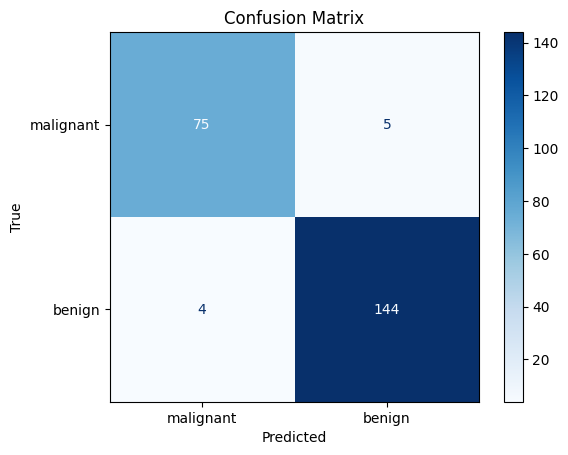

In [18]:
bnb = BernoulliNB(alpha=1.0, binarize=110)
bnb.fit(X_train, y_train)

print("--- Naive Bayes: Bernoulli ---")
evaluate_model(bnb, X_test, y_test, class_names=bc.target_names, folder="breast_cancer_confusion_matrix_bernoulli.png")

## Breast Cancer: Decision Tree

### Gini


--- Decision Tree (gini) ---
Accuracy:  0.9386
Precision: 0.9291
Recall:    0.9383
F1-score:  0.9333

Classification Report:
              precision    recall  f1-score   support

   malignant       0.89      0.94      0.91        80
      benign       0.97      0.94      0.95       148

    accuracy                           0.94       228
   macro avg       0.93      0.94      0.93       228
weighted avg       0.94      0.94      0.94       228

Plot saved to assets/breast_cancer_confusion_matrix_gini.png


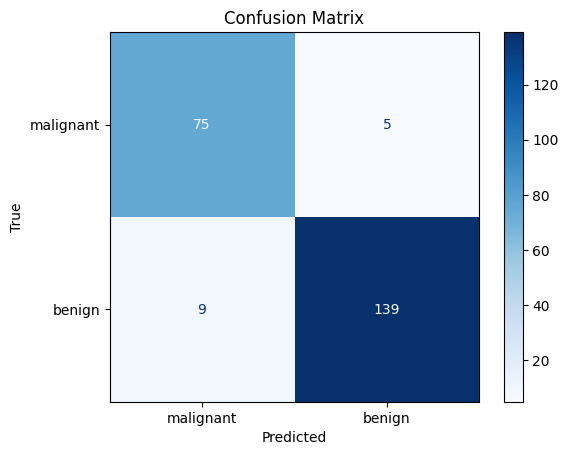

Plot saved to assets/breast_cancer_decision_tree_gini.png


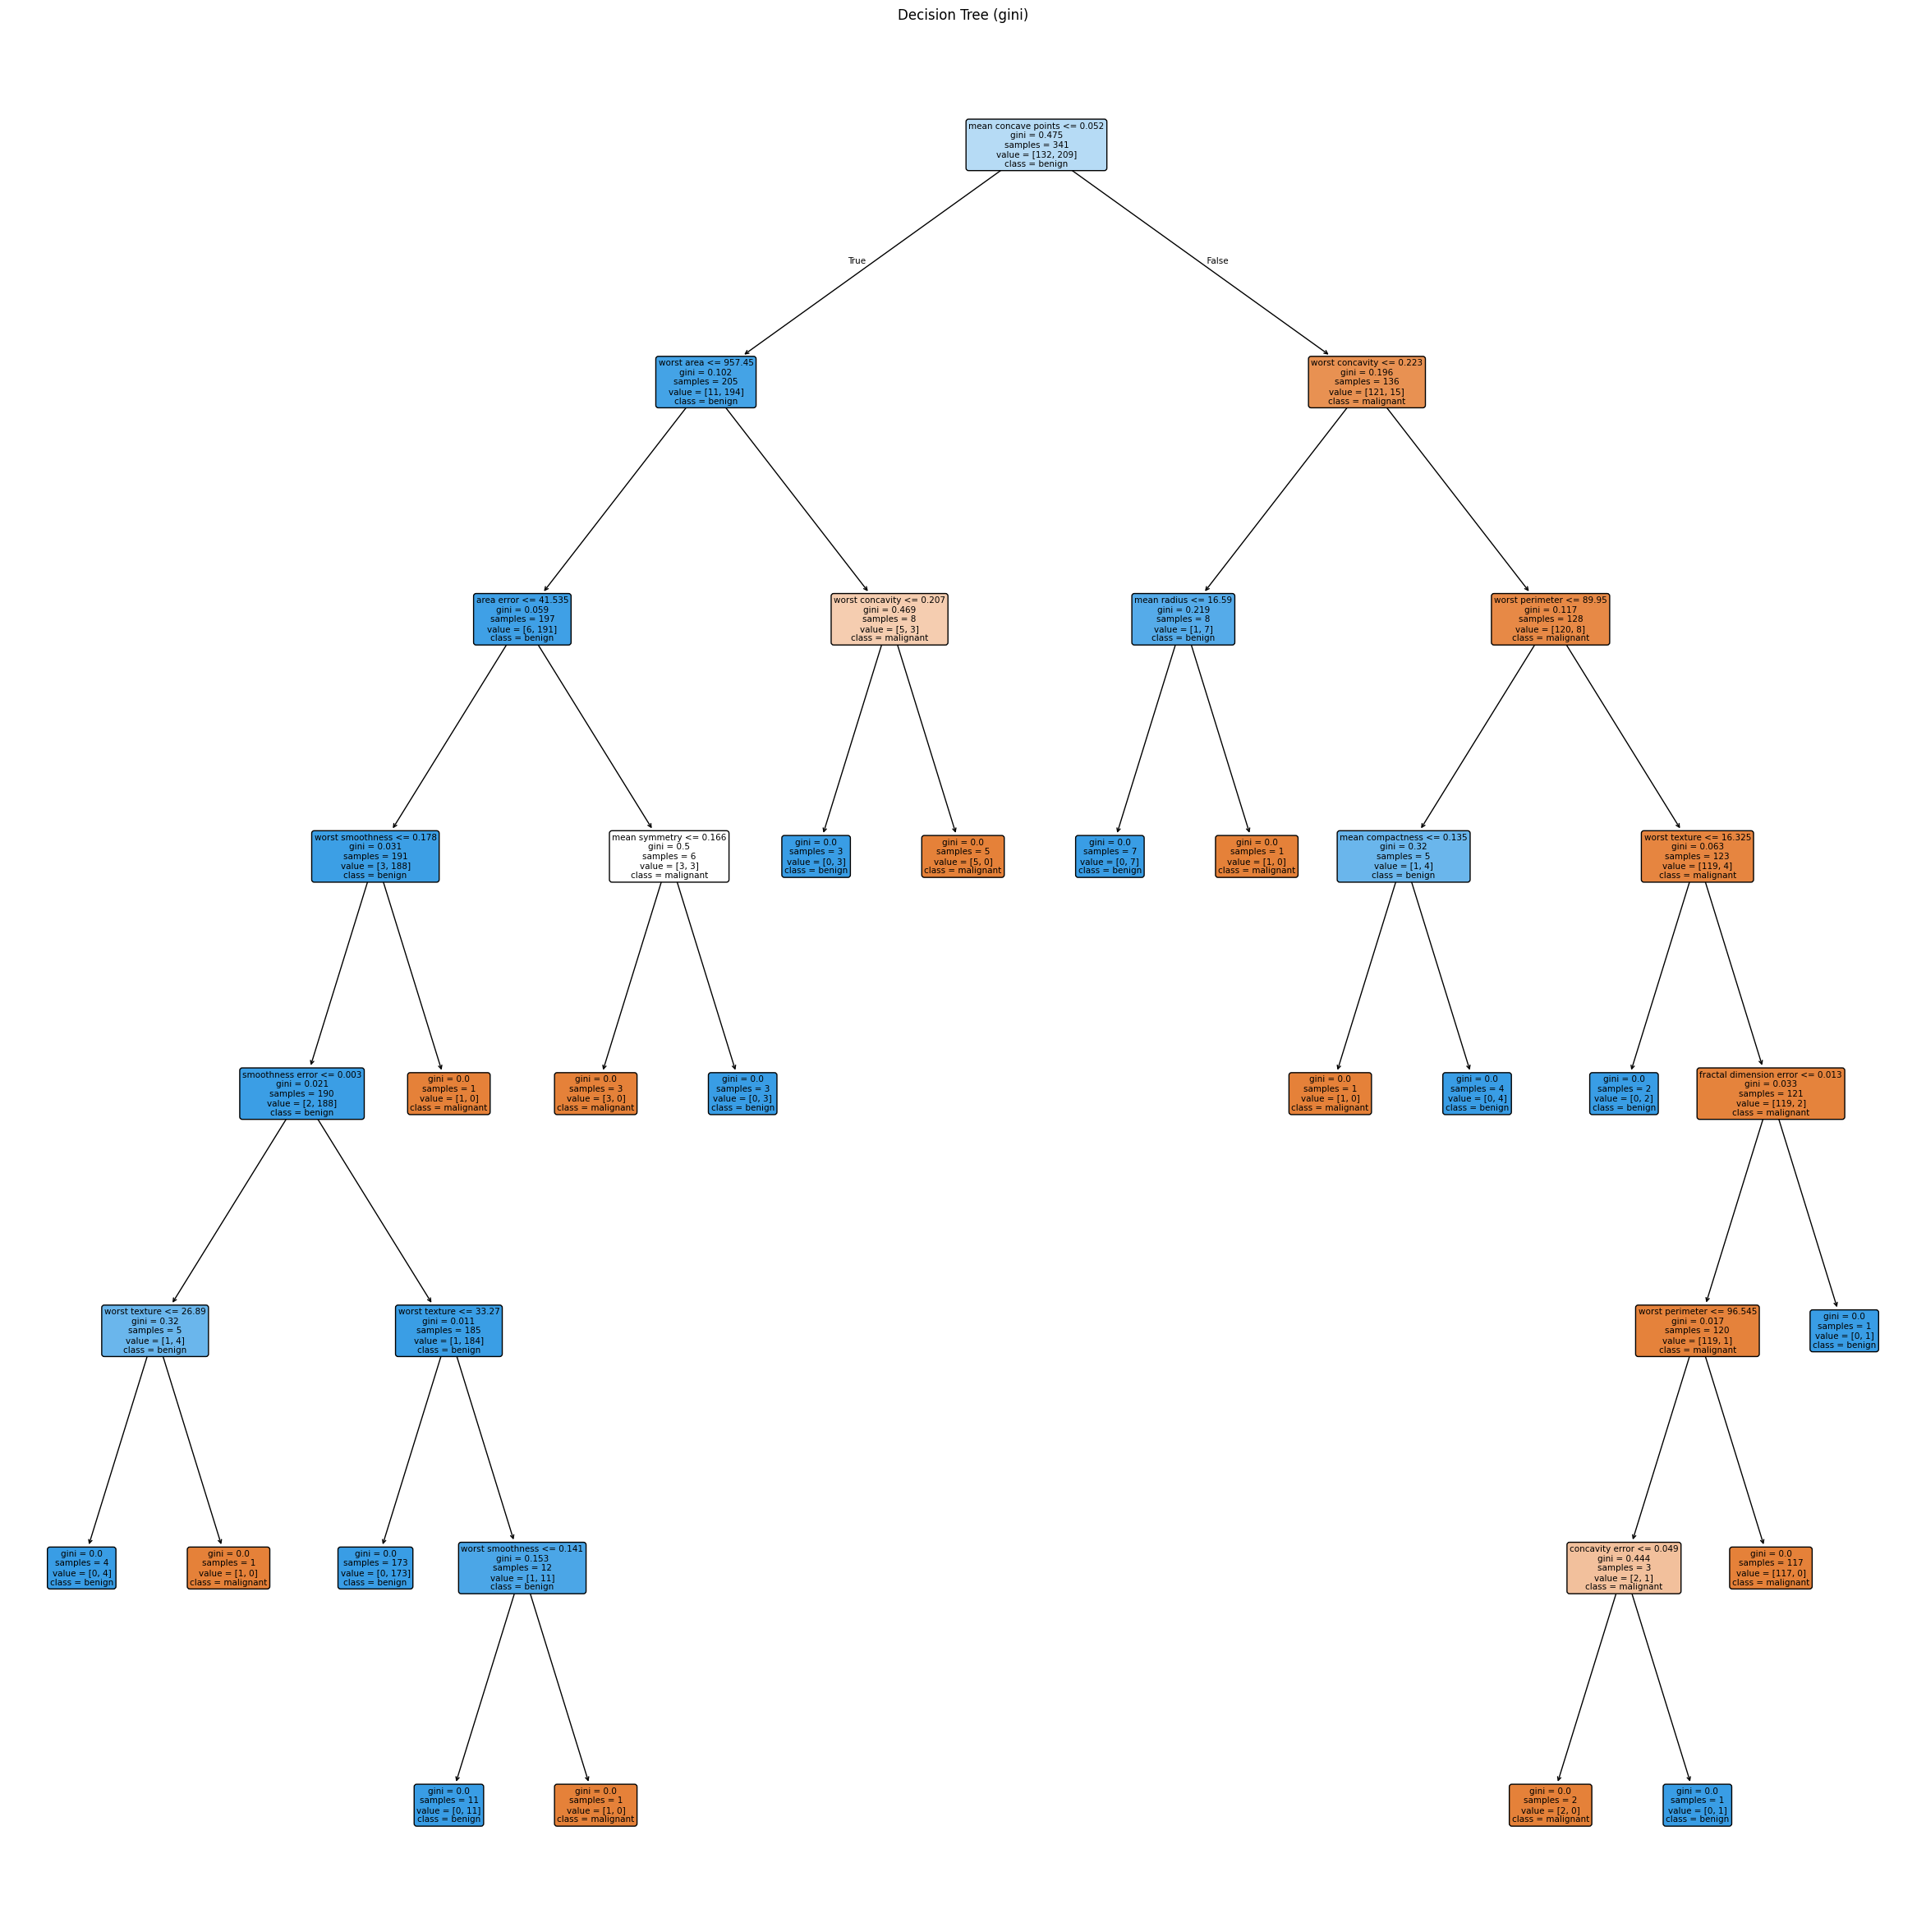

In [19]:
print(f"\n--- Decision Tree (gini) ---")

dt = DecisionTreeClassifier(
    criterion="gini",
    max_depth=None,
    random_state=42
)
dt.fit(X_train, y_train)
evaluate_model(dt, X_test, y_test, class_names=bc.target_names, folder="breast_cancer_confusion_matrix_gini.png")

plot_decision_tree(dt, X_test, y_test, criterion="gini", feature_names=bc.feature_names, class_names=bc.target_names, folder="breast_cancer_decision_tree_gini.png")

### Entropy


--- Decision Tree (entropy) ---
Accuracy:  0.9518
Precision: 0.9539
Recall:    0.9399
F1-score:  0.9462

Classification Report:
              precision    recall  f1-score   support

   malignant       0.96      0.90      0.93        80
      benign       0.95      0.98      0.96       148

    accuracy                           0.95       228
   macro avg       0.95      0.94      0.95       228
weighted avg       0.95      0.95      0.95       228

Plot saved to assets/breast_cancer_confusion_matrix_entropy.png


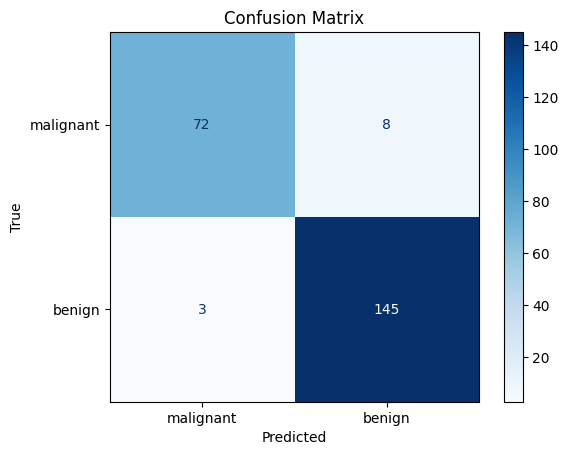

Plot saved to assets/breast_cancer_decision_tree_entropy.png


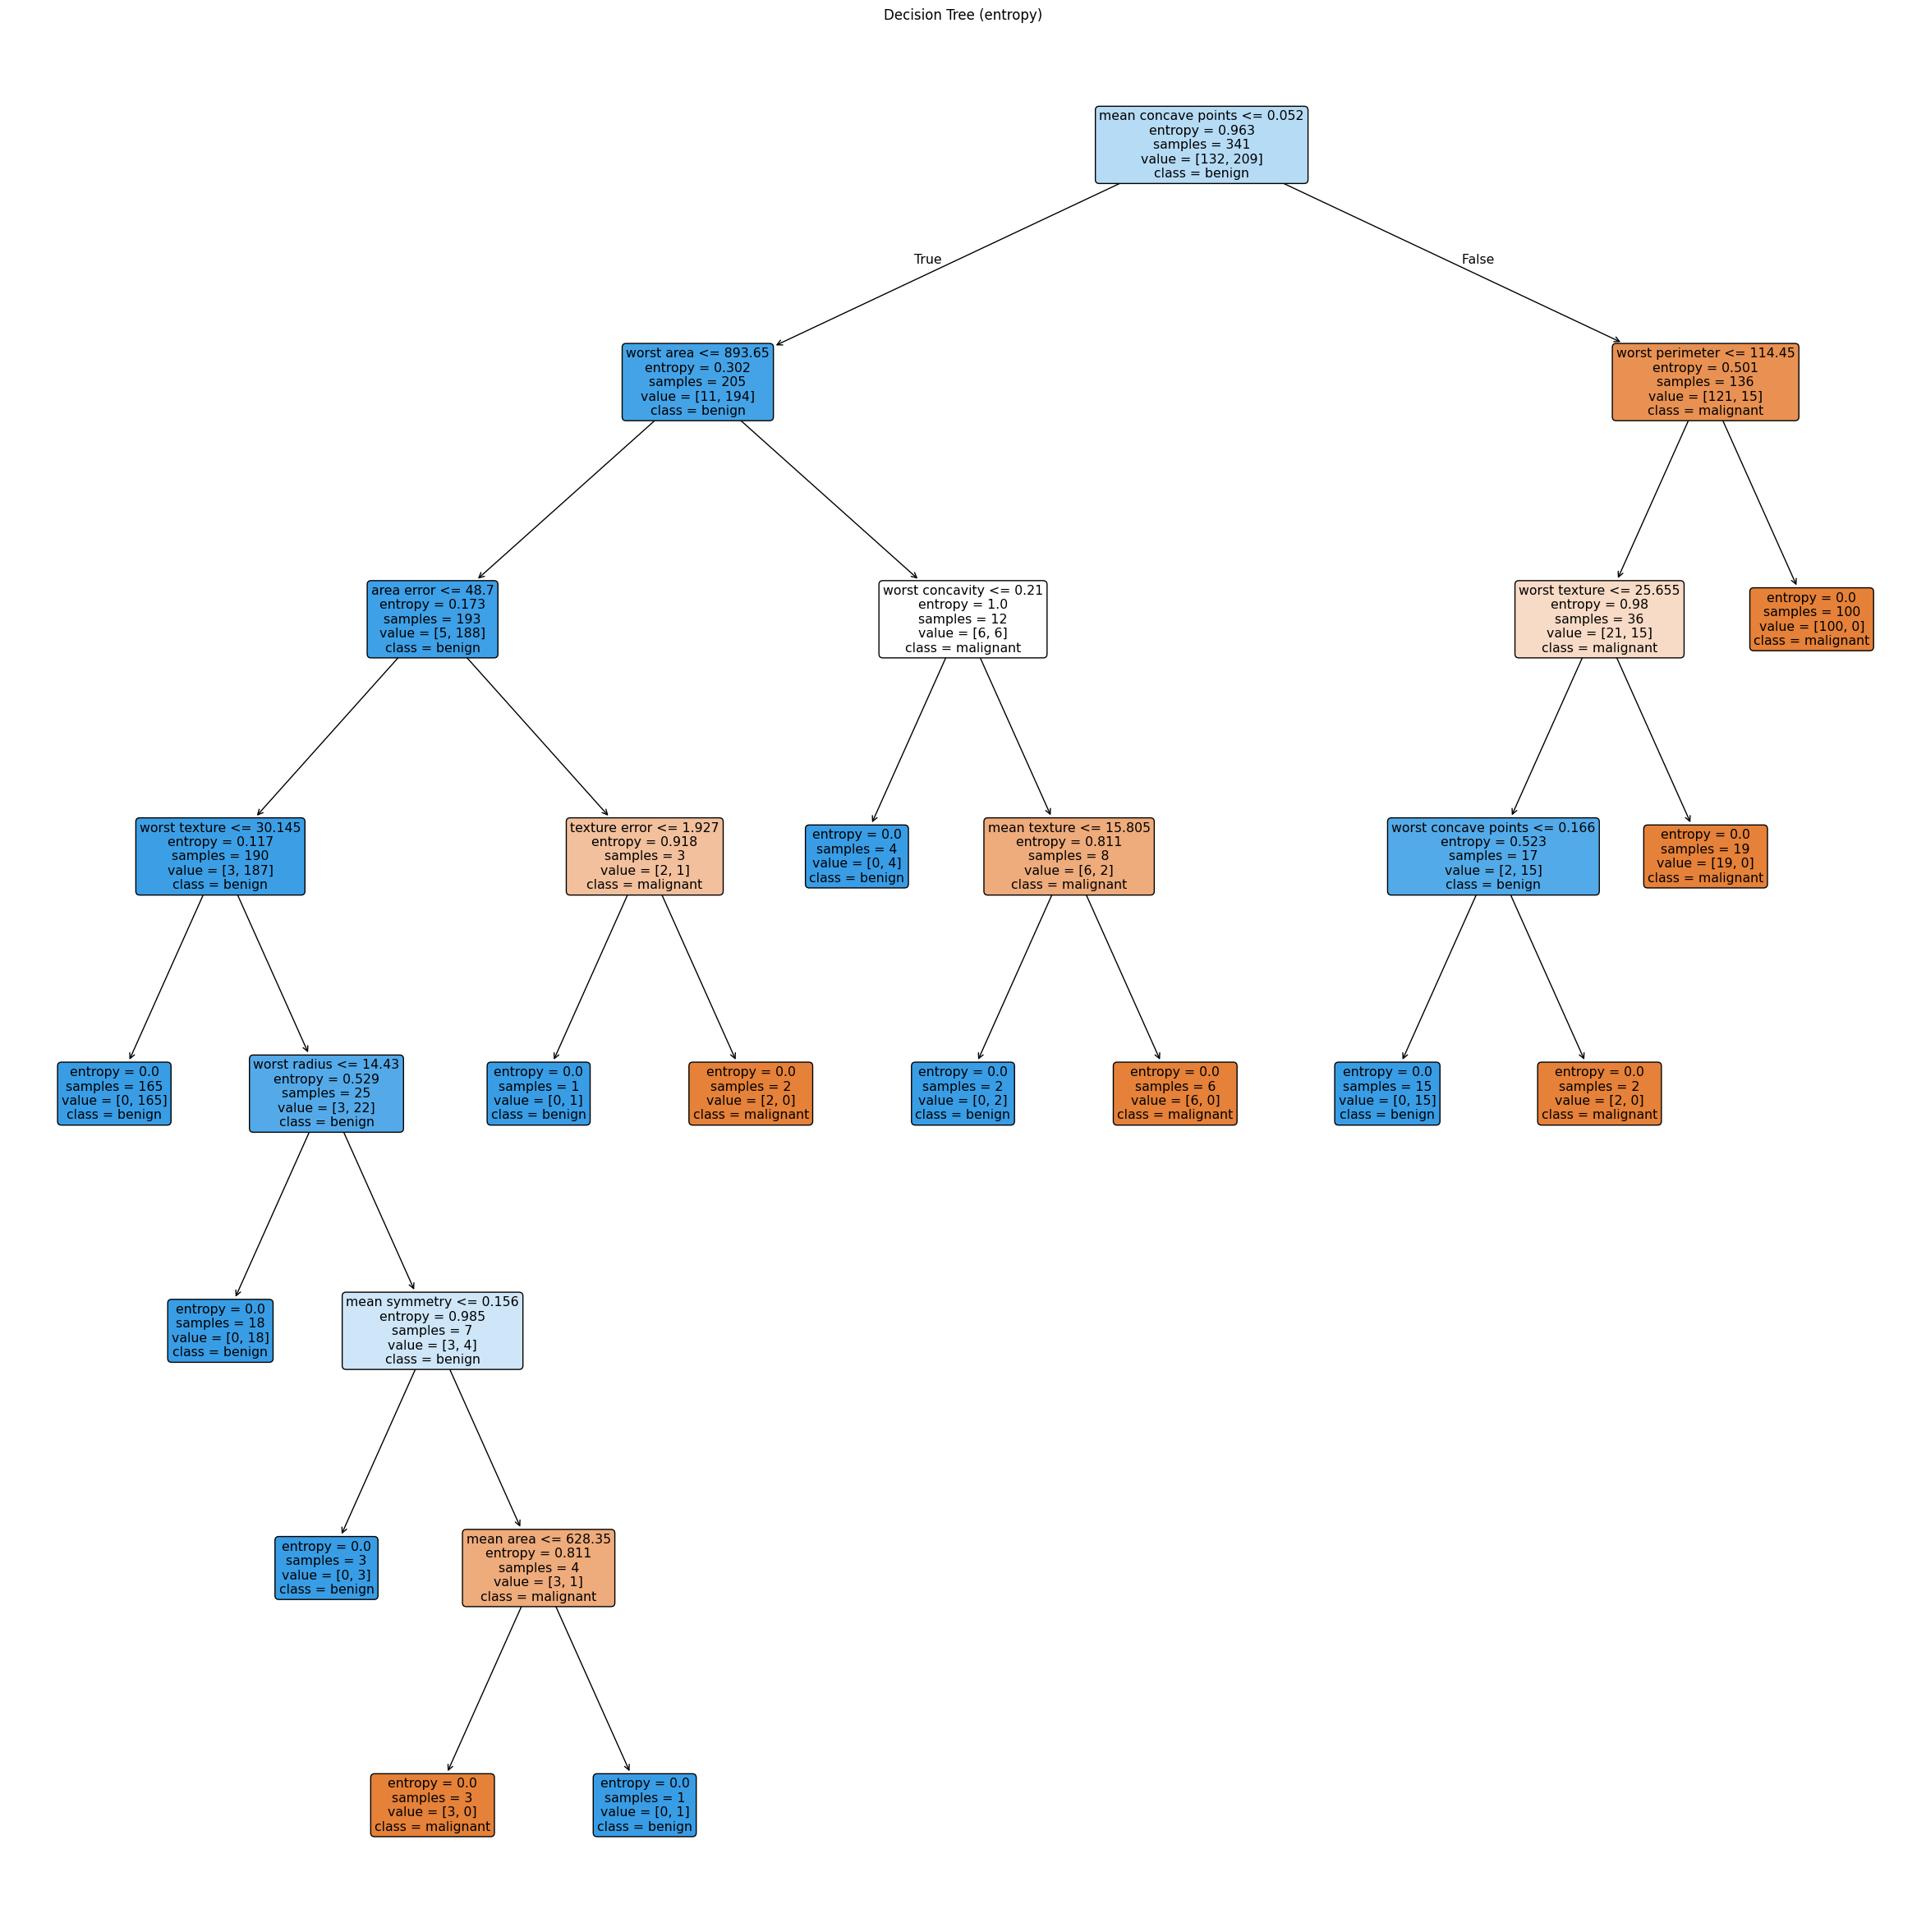

In [20]:
print(f"\n--- Decision Tree (entropy) ---")

dt = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=None,
    random_state=42
)
dt.fit(X_train, y_train)
evaluate_model(dt, X_test, y_test, class_names=bc.target_names, folder="breast_cancer_confusion_matrix_entropy.png")

plot_decision_tree(dt, X_test, y_test, criterion="entropy", feature_names=bc.feature_names, class_names=bc.target_names, folder="breast_cancer_decision_tree_entropy.png")